In [99]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from uedge import *
from uedge.hdf5 import *
#import plotmesh as pm
from uetools import Case
from uedge.gridue import write_gridue
from Forthon import gchange
from scipy.integrate import simpson

In [129]:
c = Case('reconverged_v12_p3.93_n2.38_imp8.25e3_dp0.06_kep0.06_kip0.06_last_ii2.hdf5')
bbb.afracs

Restoring case from HDF5 file:
  Rate dirs read from .uedgerc
  Grid read from .../jupyter/MANTA_final_baseline/reconverged_v12_p3.93_n2.38_imp8.25e3_dp0.06_kep0.06_kip0.06_last_ii2.hdf5
  User-specified diffusivities read from HDF5 file ".../jupyter/MANTA_final_baseline/reconverged_v12_p3.93_n2.38_imp8.25e3_dp0.06_kep0.06_kip0.06_last_ii2.hdf5"
UETOOLS-style save successfully restored from .../jupyter/MANTA_final_baseline/reconverged_v12_p3.93_n2.38_imp8.25e3_dp0.06_kep0.06_kip0.06_last_ii2.hdf5
*** For isimpon=2, set afracs, not afrac ***

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 4.54e-01



array([[0.00825, 0.00825, 0.00825, ..., 0.00825, 0.00825, 0.00825],
       [0.00825, 0.00825, 0.00825, ..., 0.00825, 0.00825, 0.00825],
       [0.00825, 0.00825, 0.00825, ..., 0.00825, 0.00825, 0.00825],
       ...,
       [0.00825, 0.00825, 0.00825, ..., 0.00825, 0.00825, 0.00825],
       [0.00825, 0.00825, 0.00825, ..., 0.00825, 0.00825, 0.00825],
       [0.00825, 0.00825, 0.00825, ..., 0.00825, 0.00825, 0.00825]])

In [93]:
# HOPEFULLY GLOBAL PLOT SETTINGS
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.titlesize'] = 22
# plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

# Midplane plots

# Plate plots

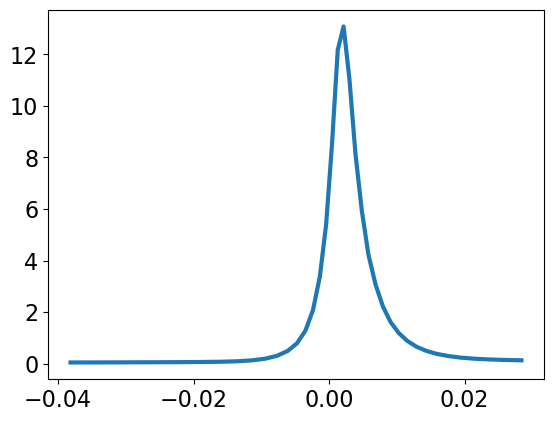

In [139]:
leftIndex = 1
rightIndex = -1
flux_tot = 1.e-6*(bbb.sdtrb[left_index:right_index]+bbb.sdrrb[left_index:right_index]).flatten()
plt.plot(com.yyrb[left_index:right_index], flux_tot)
np.savetxt('outer_flux.csv', np.vstack((com.yyrb[left_index:right_index].flatten(),flux_tot)).T, delimiter=', ')

2 64


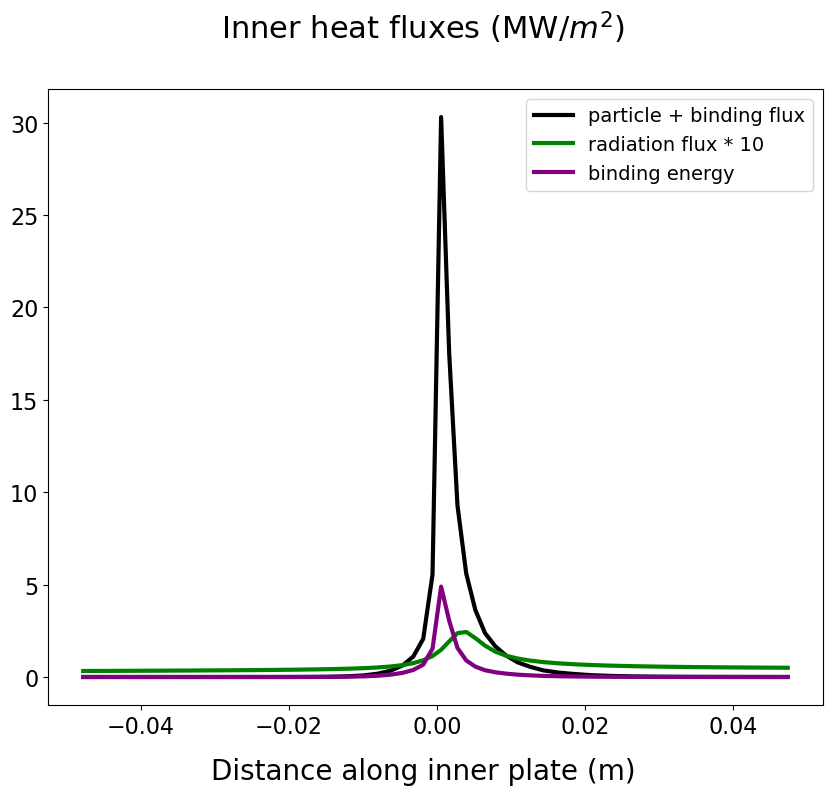

np.float64(0.14886611326343485)

In [151]:
left_index = 2  # Adjust this as needed
right_index = -7 # Adjust this as needed
fig, axs = plt.subplots(1, figsize=(10,8))
bbb.fqp=0
bbb.plateflux(); #internally calculated fluxes (postprocessing)
fig.suptitle('Inner heat fluxes (MW/$m^2$)')
fig.supxlabel('Distance along inner plate (m)', fontsize=20)
x = com.yylb[1:-1]
axs.plot(com.yylb[left_index:right_index],1.e-6*(bbb.sdtlb[left_index:right_index]), label='particle + binding flux', color='0')
axs.plot(com.yylb[left_index:right_index],1.e-6*(bbb.sdrlb[left_index:right_index])*10, label='radiation flux * 10', color='g')
axs.plot(com.yylb[left_index:right_index], bbb.sbindlb[left_index:right_index,:]*1e-6, color='purple', label='binding energy')
print(com.nisp,com.nx)
axs.legend(fontsize=14)
plt.savefig('inner_div_plot2.png')
plt.show()
com.yyrb.size
np.mean(1.e-6*(bbb.sdrrb))

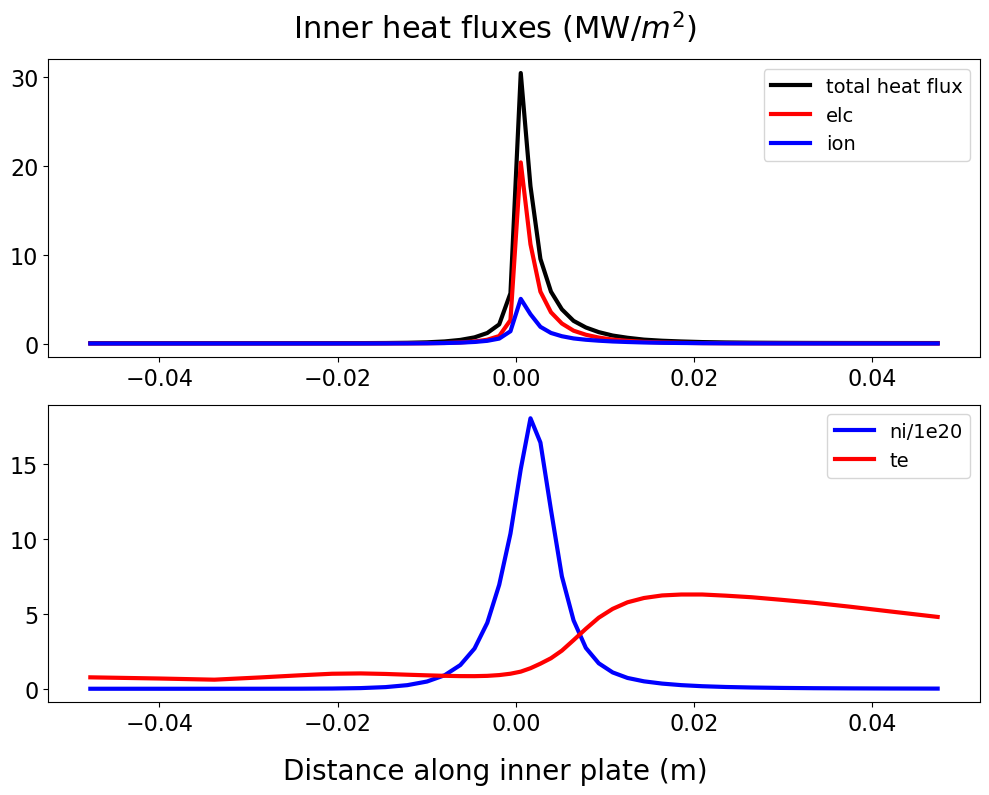

Integrated total heat: 0.103708, radiated heat: 0.009615 MW; f_rad_div: 0.092715


In [162]:
left_index = 2  # Adjust this as needed
right_index = -7 # Adjust this as needed

fig, axs = plt.subplots(2, figsize=(10,8))
bbb.fqp = 0
bbb.plateflux()  # Internally calculated fluxes (postprocessing)
fig.suptitle('Inner heat fluxes (MW/$m^2$)')
fig.supxlabel('Distance along inner plate (m)', fontsize=20)

# Truncate data between left_index and right_index
x = com.yylb[left_index:right_index]  # Adjust yylb slicing
axs[0].plot(com.yylb[left_index:right_index], 1.e-6*(bbb.sdtlb[left_index:right_index]+bbb.sdrlb[left_index:right_index]), label='total heat flux', color='0')
# axs[0].plot(com.yylb[left_index:right_index], 1.e-6*(bbb.sdrlb[left_index:right_index])*10, label='radiation flux * 10', color='g')
# axs[0].plot(com.yyrb[left_index:right_index], 1.e-6*bbb.sdrrb[left_index:right_index]*10, label='tot rad flx*10')
# axs[0].legend(fontsize=14)

# For the second plot, slice arrays accordingly
axs[0].plot(x, bbb.sdelb[left_index:right_index]*1e-6, '-r', label='elc')
axs[0].plot(x, bbb.sdilb[left_index:right_index]*1e-6, '-b', label='ion')
# axs[1].plot(x, bbb.sbindlb[left_index:right_index,:]*1e-6/5, color='purple', label='binding energy / 5')
axs[0].legend(fontsize=14)

# For the third plot, slice arrays accordingly
axs[1].plot(x, bbb.ni[com.nx+1,left_index:right_index,0]/1e20, '-b', label='ni/1e20')
axs[1].plot(x, bbb.te[com.nx+1,left_index:right_index]/bbb.ev, '-r', label='te')
axs[1].legend(fontsize=14)

plt.tight_layout()

# Save and show the plot
plt.savefig('inner_div_plot.png')
plt.show()
rad_heat = simpson(y=(1.e-6*(bbb.sdrlb)).flatten(),x=com.yylb.flatten())
tot_heat = simpson(y=(1.e-6*(bbb.sdtlb+bbb.sdrlb)).flatten(),x=com.yylb.flatten())
print(f'Integrated total heat: {tot_heat:3f}, radiated heat: {rad_heat:3f} MW; f_rad_div: {(rad_heat/tot_heat):3f}')

2 64


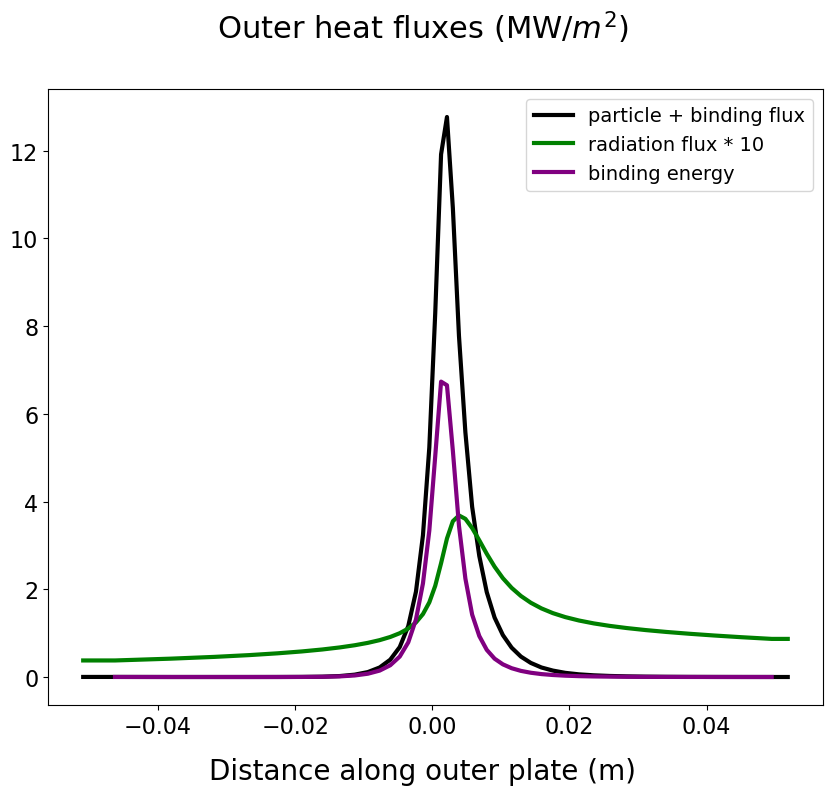

In [155]:
fig, axs = plt.subplots(1, figsize=(10,8))
bbb.fqp=0
bbb.plateflux(); #internally calculated fluxes (postprocessing)
fig.suptitle('Outer heat fluxes (MW/$m^2$)')
fig.supxlabel('Distance along outer plate (m)', fontsize=20)
x = com.yyrb[1:-1]
axs.plot(com.yyrb,1.e-6*(bbb.sdtrb), label='particle + binding flux', color='0')
axs.plot(com.yyrb,1.e-6*(bbb.sdrrb)*10, label='radiation flux * 10', color='g')
axs.plot(x, bbb.sbindrb[1:com.ny+1,:]*1e-6, color='purple', label='binding energy')
print(com.nisp,com.nx)
axs.legend(fontsize=14)
plt.savefig('outer_div_plot2.png')
plt.show()


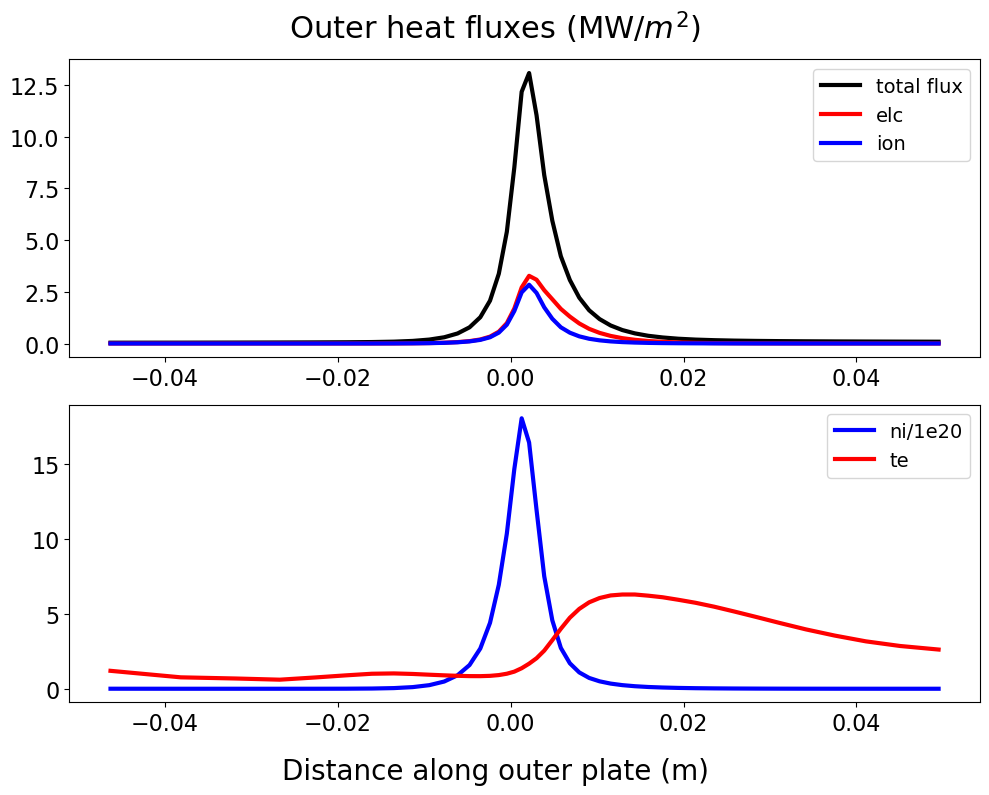

Integrated total heat: 0.089592, radiated heat: 0.011097 MW; f_rad_div: 0.123860


In [164]:
fig, axs = plt.subplots(2, figsize=(10,8))
bbb.fqp=0
bbb.plateflux(); #internally calculated fluxes (postprocessing)
fig.suptitle('Outer heat fluxes (MW/$m^2$)')
fig.supxlabel('Distance along outer plate (m)', fontsize=20)
leftIndex = 1
rightIndex = -1
x = com.yyrb[leftIndex:rightIndex]
axs[0].plot(x,1.e-6*(bbb.sdtrb[leftIndex:rightIndex]+bbb.sdrrb[leftIndex:rightIndex]), label='total flux', color='0')
# axs[0].plot(com.yyrb,1.e-6*(bbb.sdrrb)*10, label='radiation flux * 10', color='g')
# axs[0].plot(com.yyrb,1.e-6*bbb.sdrrb*10, label='tot rad flx*10')
# axs[0].legend(fontsize=14)
# axs[0].plot(com.yylb,1.e-6*bbb.sbindrb)
axs[0].plot(x, bbb.sderb[leftIndex:rightIndex]*1e-6, '-r', label='elc')
axs[0].plot(x, bbb.sdirb[leftIndex:rightIndex]*1e-6, '-b', label='ion')
# axs[1].plot(x, bbb.sbindrb[1:com.ny+1,:]*1e-6/5, color='purple', label='binding energy / 5')
# print(com.nisp,com.nx)
# axs[2].plot(x, bbb.engirb[1:com.ny+1,com.nisp-1,com.nxpt-1], '--r', label='ave ion energy')
# axs[2].plot(com.yylb, bbb.pwr_pltz[0:ny+1,2*nxpt), '--b', label='rad')
axs[0].legend(fontsize=14)
axs[1].plot(x, bbb.ni[com.nx+1,1:-1,0]/1e20, '-b', label='ni/1e20')
axs[1].plot(x, bbb.te[com.nx+1,1:-1]/bbb.ev, '-r', label='te')
axs[1].legend(fontsize=14)
plt.tight_layout()
# axs[3].plot(x, bbb.sbindrb[1:com.ny+1,:]*1e-6, '-r', label='binding energy')
# axs[3].plot(x, bbb.pradhyd[com.nx+1,1:-1]/1e7, '-b', label='prad by hyd * 1e-7')
# axs[3].legend()
plt.savefig('outer_div_plot.png')
plt.show()
com.yyrb.size
np.mean(1.e-6*(bbb.sdrrb))
from scipy.integrate import simpson
rad_heat = simpson(y=(1.e-6*(bbb.sdrrb)).flatten(),x=com.yyrb.flatten())
tot_heat = simpson(y=(1.e-6*(bbb.sdtrb+bbb.sdrrb)).flatten(),x=com.yyrb.flatten())
print(f'Integrated total heat: {tot_heat:3f}, radiated heat: {rad_heat:3f} MW; f_rad_div: {(rad_heat/tot_heat):3f}')

In [169]:
bbb.fqp=0
bbb.plateflux();

pcore = simpson( (bbb.feiy+bbb.feey)[com.ixpt1[0]+1:com.ixpt2[0]+1,0]) / 1e6
psep = simpson( (bbb.feiy+bbb.feey)[com.ixpt1[0]+1:com.ixpt2[0]+1,com.iysptrx]) / 1e6

print(f' Power from core boundary (surface closest to magnetic axis) = {pcore:.3f} MW  \n \
Power at Separatrix = {psep:.3f} MW  \n \
Power radiated in core region = {(pcore-psep):.3f} MW = {((abs(pcore-psep)/pcore)*100):3f}%')
particlecore = simpson( (bbb.fniy)[com.ixpt1[0]+1:com.ixpt2[0],0])

pleft = simpson( (bbb.feiy+bbb.feey)[com.ixpt1[0]+1:32,com.iysptrx]) / 1e6
pright = simpson( (bbb.feiy+bbb.feey)[32:com.ixpt2[0]+1,com.iysptrx]) / 1e6
print(f'From LCFS, {(pright/pleft):.3f} times more power going out into high field side than low field side\n Left:{pleft} MW | Right: {pright} MW')

 Power from core boundary (surface closest to magnetic axis) = 7.970 MW  
 Power at Separatrix = 5.249 MW  
 Power radiated in core region = 2.721 MW = 34.145236%
From LCFS, 1.379 times more power going out into high field side than low field side
 Left:2.036246438892604 MW | Right: 2.8087913904804447 MW


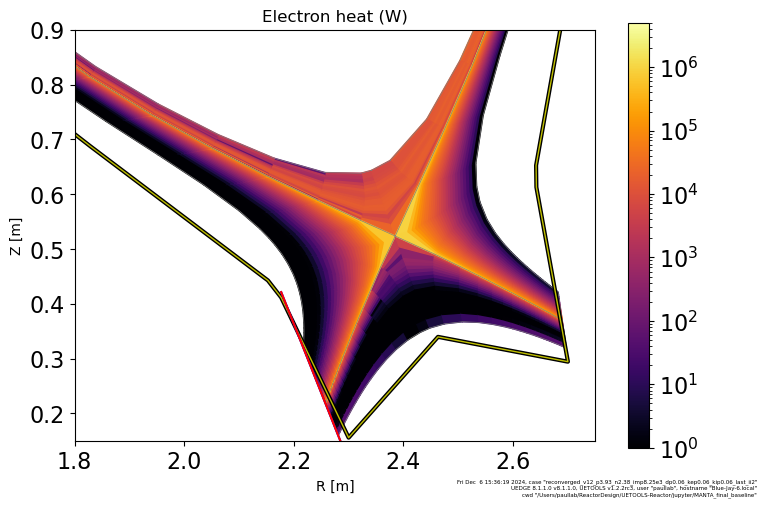

In [157]:
c.plot.mesh(
    abs(bbb.feex), 
    log=True,
    xlim=(1.8, 2.75), 
    ylim=(0.15,0.9), 
    figsize=(7,5), 
    zrange=(1,5e6),
    cmap='inferno',
    title='Electron heat (W)'
);